# Omdena Algeria Chapter



## Task2: EDA for diseases and pest detection🌱
> In this task we will go through the data available and make some basic analysis

> Data source: https://www.kaggle.com/datasets/sadmansakibmahi/plant-disease-expert


#### Let us start by loading our datasets

In [ ]:
#Installing packages that might be necessary
!pip install opendatasets 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

#### Let us download our data on the collab VM. 
> The data is ~2gb,downloading on vm saves our download time and resources

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/sadmansakibmahi/plant-disease-expert'
od.download(dataset_url)

Skipping, found downloaded files in "./plant-disease-expert" (use force=True to force download)


#### Our data has been downloaded and is ready for us to explore!

In [ ]:
##importing the libraries required
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import random

%matplotlib inline

In [ ]:
!ls "/content/plant-disease-expert" #let us have a look at our available folders

'Image Data base'  'plant diseases cure'


In [ ]:
!ls "/content/plant-disease-expert/plant diseases cure"

cure.json


In [ ]:
!ls "/content/plant-disease-expert/Image Data base/Image Data base" #let us have a look  at our folders

'algal leaf in tea'
'anthracnose in tea'
'Apple Apple scab'
'Apple Black rot'
'Apple Cedar apple rust'
'Apple healthy'
'Bacterial leaf blight in rice leaf'
'bird eye spot in tea'
'Blight in corn Leaf'
'Blueberry healthy'
'brown blight in tea'
'Brown spot in rice leaf'
'cabbage looper'
'Cercospora leaf spot'
'Cherry (including_sour) healthy'
'Cherry (including sour) Powdery mildew'
'Common Rust in corn Leaf'
'corn crop'
'Corn (maize) healthy'
 Garlic
 ginger
'Grape Black rot'
'Grape Esca Black Measles'
'Grape healthy'
'Grape Leaf blight Isariopsis Leaf Spot'
'Gray Leaf Spot in corn Leaf'
'healthy tea leaf'
'Leaf smut in rice leaf'
'lemon canker'
'Nitrogen deficiency in plant'
 onion
'Orange Haunglongbing Citrus greening'
'Peach healthy'
'Pepper bell Bacterial spot'
'Pepper bell healthy'
'potassium deficiency in plant'
'potato crop'
'Potato Early blight'
'Potato healthy'
'potato hollow heart'
'Potato Late blight'
'Raspberry healthy'
'red leaf spot in tea'
'Sogatella rice'
'Soybean health

#### from what it looks like we only  have a huge image data  base instead of a seperated training and validation sets or a csv with labeled filenames for images

In [ ]:
#We find the class labels, let us store it
sets=os.listdir("/content/plant-disease-expert/Image Data base/Image Data base")

In [ ]:
sets #let us check our stored labels

['Grape Leaf blight Isariopsis Leaf Spot',
 'Potato healthy',
 'Strawberry healthy',
 'Pepper bell Bacterial spot',
 'algal leaf in tea',
 'corn crop',
 'Tomato Leaf Mold',
 'bird eye spot in tea',
 'Blight in corn Leaf',
 'Blueberry healthy',
 'Bacterial leaf blight in rice leaf',
 'brown blight in tea',
 'Garlic',
 'cabbage looper',
 'Apple Apple scab',
 'Tomato Tomato mosaic virus',
 'potato hollow heart',
 'Tomato Septoria leaf spot',
 'Apple Black rot',
 'Gray Leaf Spot in corn Leaf',
 'Corn (maize) healthy',
 'Grape Esca Black Measles',
 'Tomato healthy',
 'Strawberry Leaf scorch',
 'Cercospora leaf spot',
 'Tomato Spider mites Two spotted spider mite',
 'tomato canker',
 'red leaf spot in tea',
 'Peach healthy',
 'Tomato Target Spot',
 'potato crop',
 'Tomato Bacterial spot',
 'Nitrogen deficiency in plant',
 'Pepper bell healthy',
 'Cherry (including sour) Powdery mildew',
 'Apple Cedar apple rust',
 'Leaf smut in rice leaf',
 'potassium deficiency in plant',
 'Potato Late blig

In [ ]:
len(sets) #How many classes are there?

58

#### Now let us check the number of images each of these classes have.
> Note: Incase the images are less than a number say "n", we will highlight  that class as the data available might not be enough.

In [ ]:
import colorama #colorama is a neat and quick way to add color to our texts
from colorama import Fore

s=0 #This will store the number of classes with less than n samples 

n=50 

num_images={}

filepaths=[]## a list to store all filenames

for label in sets:
  #we  have our labels=class names (folder names)
  path="/content/plant-disease-expert/Image Data base/Image Data base/"+label #let  us create a path for each folder
  #Store the number of images in each folder/class name
  num_images[label]=len(os.listdir(path))
  ##Storing all filenames in  a particular folder
  flabel=os.listdir(path)

  if num_images[label]<=n: #checking if our data is coming short 
    ## we will print the classes <n, this in red so it is a bit easier to catch for the naked eye
    print(Fore.RED+ label+ " has only:",num_images[label],"images, which is less than required") 
    #let us  update our "classes not meeting the required image numbers" counter
    s+=1
  else:
    #all the other classes that fulfil the set criteria  get their number of images printed
    print(Fore.GREEN+label+" has:",num_images[label],"images")

  for f in flabel:
    ##joining filename to the parent folder
    image_path=os.path.join(path,f)
    #storing it in the list
    filepaths.append(image_path)

Grape Leaf blight Isariopsis Leaf Spot has: 3444 images
Potato healthy has: 122 images
Strawberry healthy has: 365 images
Pepper bell Bacterial spot has: 997 images
algal leaf in tea has: 113 images
corn crop has: 104 images
Tomato Leaf Mold has: 952 images
bird eye spot in tea has: 100 images
Blight in corn Leaf has: 1146 images
Blueberry healthy has: 1202 images
Bacterial leaf blight in rice leaf has only: 40 images, which is less than required
brown blight in tea has: 113 images
Garlic has only: 49 images, which is less than required
cabbage looper has: 78 images
Apple Apple scab has: 2016 images
Tomato Tomato mosaic virus has: 373 images
potato hollow heart has: 60 images
Tomato Septoria leaf spot has: 1771 images
Apple Black rot has: 1988 images
Gray Leaf Spot in corn Leaf has: 574 images
Corn (maize) healthy has: 930 images
Grape Esca Black Measles has: 4428 images
Tomato healthy has: 1273 images
Strawberry Leaf scorch has: 888 images
Cercospora leaf spot has: 63 images
Tomato Sp

In [ ]:
##So how many of these classes have less than n images?
print(s)

12


#### So 12 out of 58 classes have less than or equal to n(=50) images.

#### Let us go on and explore more, maybe which class has the largest set of images available?

In [ ]:
largest= max(num_images,key=num_images.get)##Finding the largest value count in the dictionary
print("The class with the highest amount of images is ",largest,"with",num_images[largest],"images")

The class with the highest amount of images is  Orange Haunglongbing Citrus greening with 17624 images


In [ ]:
##Total images  available
sum(num_images.values())

66556

#### We have a total of ~66k images available.

#### Let us plot a graph to check the number  of images in these classes

In [ ]:
plant=list(num_images.keys())
values=list(num_images.values())

Text(0.5, 0, 'Image dataset')

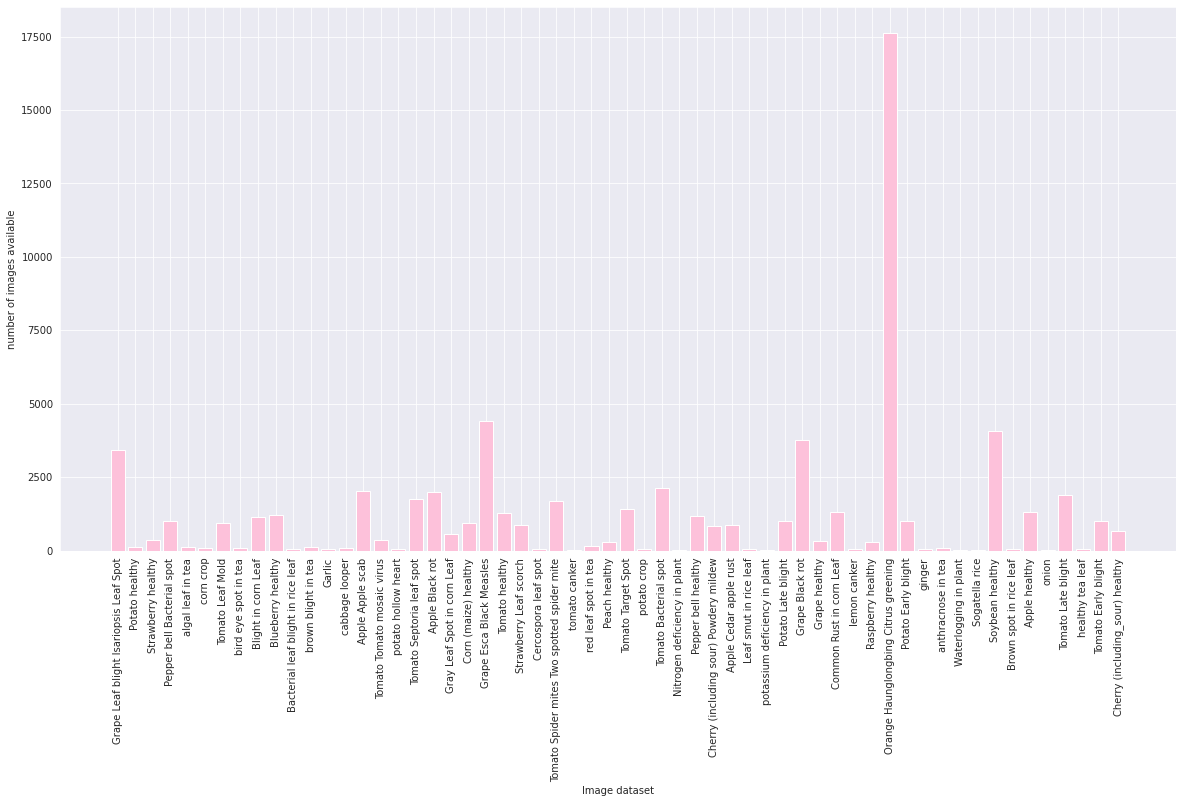

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize =(20, 10))

plt.bar(plant,values,color="#FDC1DA")
plt.xticks(rotation=90)
ax.xaxis.set_ticks_position('none')
plt.ylabel("number of images available")
plt.xlabel("Image dataset")


#### Let us check if our images are of uniform size of 256

> usually this would be done using matplot lib and sns but due to resource restrains we will  be using practicality over visual ease. 

In [ ]:


# get image
def hw(f):

  """
  This function inputs an image filepath and returns the height and width using Pillow
 
  """
#store the image 
  img = Image.open(f)

# get width and height of the said image
  width = img.width
  height = img.height
   
  return height,width


In [ ]:
## We use the function above to find out which images arent 256*256

#66k images better to log time incase of something unexpected
%%time

#store the images that arent 256*256 in the following list 
Unusual_ImgSize=[]

#loop to go through all the images
for f in filepaths:
  
  #h=height,w=width
  h,w=hw(f)

  #checking if the image is 256
  if h!=256 and w!=256:
    ## if it isnt the appropriate size we simply add the image path in our list
    Unusual_ImgSize.append(f)


CPU times: user 3.66 s, sys: 594 ms, total: 4.26 s
Wall time: 4.28 s


#### Let us check the images that dont fit the size

In [ ]:
len(Unusual_ImgSize)

1698

In [ ]:
#1698 images out of 66k images arent 256, let us check the size of 10 of these images

for i in Unusual_ImgSize[:10]:
  h,w=hw(i)
  print(i,"--height:",h,"width:",w)

/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea8.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea13.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea84.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea3.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea83.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea70.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_in_tea31.jpg --height: 1024 width: 768
/content/plant-disease-expert/Image Data base/Image Data base/algal leaf in tea/algal_leaf_i

#### Now finally we take a look into our images

####  Let us plot two subplots one with healthy plants and one with unhealthy plants
> Here we take apples as an example


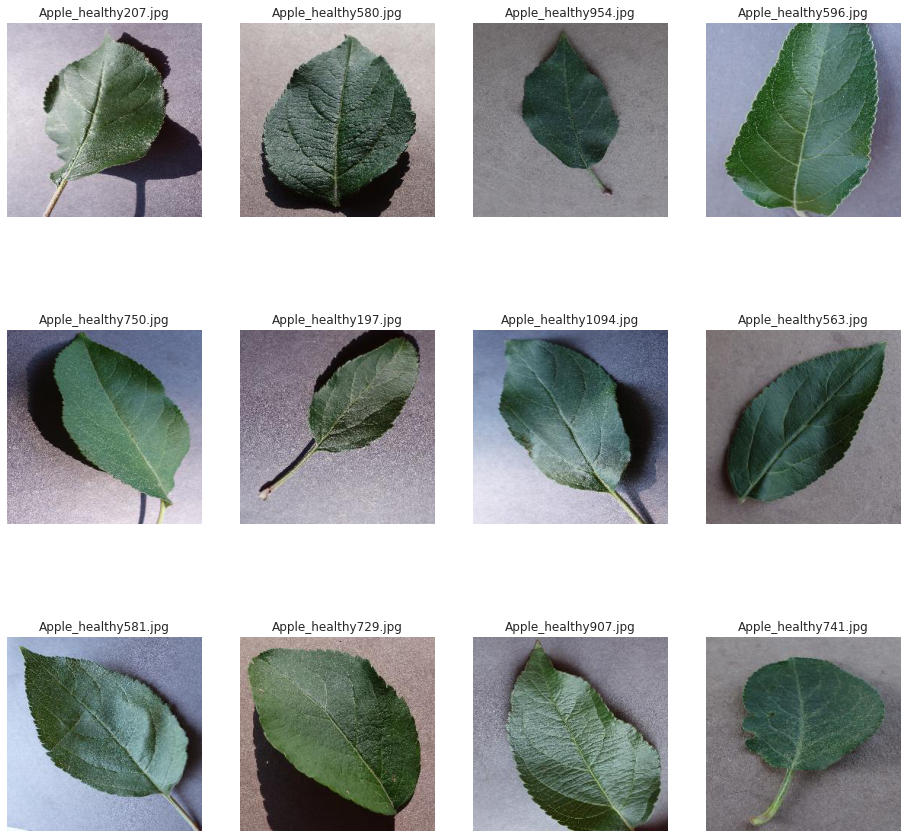

In [ ]:
##Healthy apples

plt.figure(figsize=(16,16))
p="/content/plant-disease-expert/Image Data base/Image Data base/Apple healthy/"
files=os.listdir(p)

for i,f in enumerate(files):
   
   g=os.path.join(p,f) #joining filename to parent folder
   img=mpimg.imread(g) #convert to an array
   ax=plt.subplot(3,4,i+1) #counting where to plot
   plt.imshow(img) #plot the image
   plt.title(f)
   plt.axis("off")
   i+=1
   if i==12: # we don't want to print the 13th image
      break
  
   

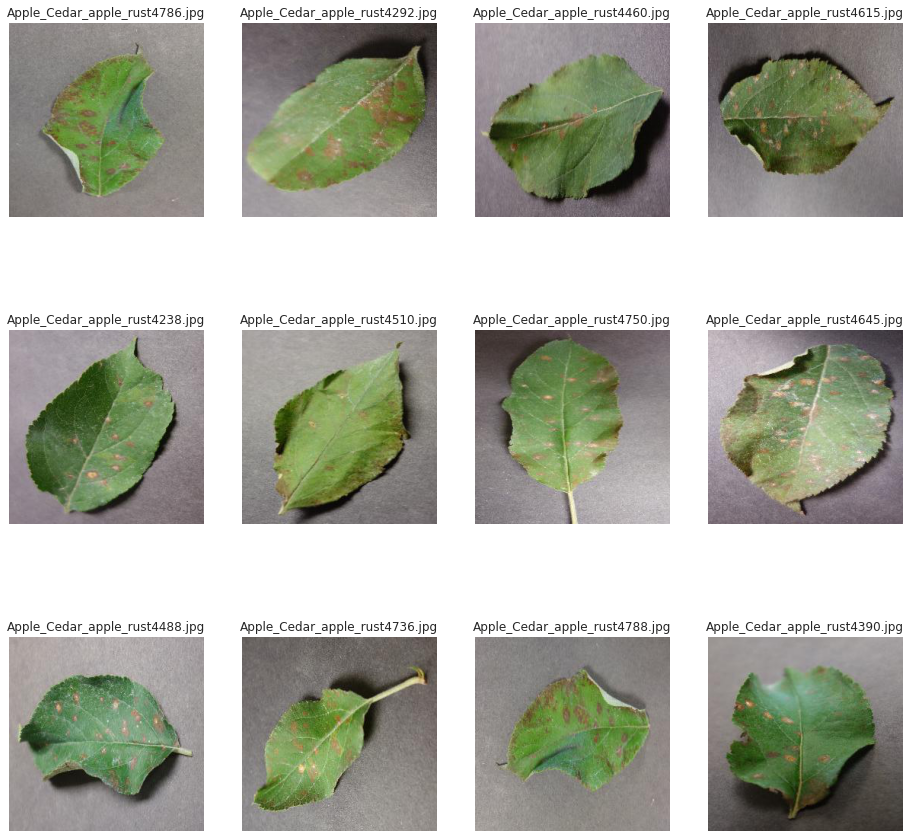

In [ ]:
### Unhealthy apples: Apple Rust

plt.figure(figsize=(16,16))
p="/content/plant-disease-expert/Image Data base/Image Data base/Apple Cedar apple rust"
files=os.listdir(p)


for i,f in enumerate(files):
   
   g=os.path.join(p,f) ##joining file to folder
   img=mpimg.imread(g)
   ax=plt.subplot(3,4,i+1) #indexing our plots
   plt.imshow(img)# plotting
   plt.title(f)
   plt.axis("off")
   i+=1 #updating index
   if i==12: #shouldn't exceed to the 13th image
      break
  

#### Now let us randomly have a look at our images

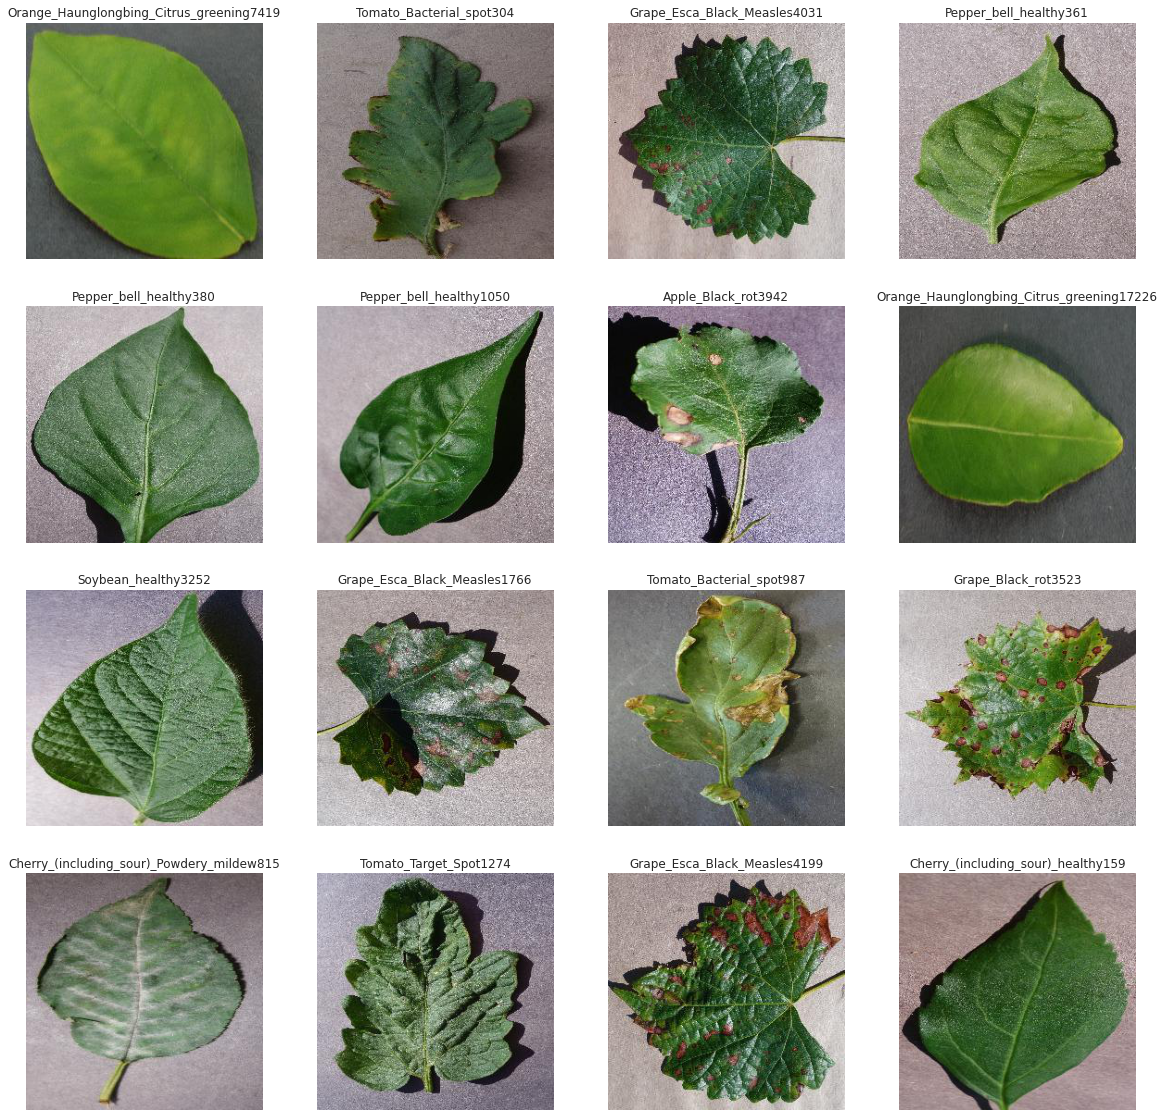

In [ ]:
#### We will be looking at 16 images (4*4)

plt.figure(figsize=(20,20))

for i in range(16):
   g=random.choice(filepaths)#no need to join as the filepath is complete
   
   #splitting filename to be used as 
   base=os.path.basename(g)

   #base[0] gives me the filename, base[1] gives me the extension. We only need the name
   fname=os.path.splitext(base)[0]
   
   #convert the file to array
   img=mpimg.imread(g)

   #index the subplots
   ax=plt.subplot(4,4,i+1)

   #plot the said file
   plt.imshow(img)

   #file name as  the title
   plt.title(fname)

   #we dont need the axes
   plt.axis("off")
   
   #update the counter variable
   i+=1
   
   #finally limiting the images to 16
   if i==16: 
      break
  

# Basic Conclusion:

### *  From what we can see our data is fairly huge (~66k) with 58 classes containing  healthy and  diseased plant photos.
### * Not all of the image classes have enough data to be worked with satisfactorily, precisely 12 classes have <= 50 images

### * Not all our images  have the same image size, but the number is comparatively smaller compared to the whole dataset

### * It is up to us to decide how to go forward: Do we take a only one plant to evlaluate(we can even merge other datasets available for a specific plamt if needed) or do we pick a small number of plants and work with it or pick a number x(say 1000) and work with all available datasets that have more than or equal to that number of images.

### * Taking these things into account and a clearer pathway for our project we can start exploring (our data even more) and preprocessing our data.